In [1]:
import pandas as pd
import os
import glob
from pathlib import Path
import sys
import numpy as np


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Abhishek/imageclass/gics_labels - gics_labels.csv")

In [3]:
df.tail()

,IMAGE_FILENAME,LABE
795,GICSD_50_7_213.png,NO_VISIBILITY
796,GICSD_50_7_233.png,PARTIAL_VISIBILITY
797,GICSD_50_8_253.png,FULL_VISIBILITY
798,GICSD_50_9_273.png,FULL_VISIBILITY
799,GICSD_50_9_293.png,FULL_VISIBILITY


In [4]:
src = r'/content/drive/MyDrive/Abhishek/imageclass/images/'

In [5]:
a =df.groupby("LABE")


In [6]:
a.get_group('PARTIAL_VISIBILITY')

,IMAGE_FILENAME,LABE
2,GICSD_1_1_33.png,PARTIAL_VISIBILITY
22,GICSD_2_3_113.png,PARTIAL_VISIBILITY
26,GICSD_2_6_193.png,PARTIAL_VISIBILITY
42,GICSD_3_6_193.png,PARTIAL_VISIBILITY
43,GICSD_3_7_213.png,PARTIAL_VISIBILITY
...,...,...
771,GICSD_49_1_53.png,PARTIAL_VISIBILITY
778,GICSD_49_6_193.png,PARTIAL_VISIBILITY
788,GICSD_50_2_73.png,PARTIAL_VISIBILITY
794,GICSD_50_6_193.png,PARTIAL_VISIBILITY


In [7]:
fil_name = os.listdir(src)

In [8]:
fil_name[0:10]

['GICSD_9_8_253.png',
 'GICSD_9_4_133.png',
 'GICSD_8_6_193.png',
 'GICSD_9_0_3.png',
 'GICSD_9_9_293.png',
 'GICSD_9_3_93.png',
 'GICSD_9_5_153.png',
 'GICSD_9_6_193.png',
 'GICSD_9_0_13.png',
 'GICSD_8_7_233.png']

In [9]:
des_FULL_VISIBILITY = r'/content/drive/MyDrive/Abhishek/imageclass/im/FULL_VISIBILITY'
des_No_VISIBILITY = r'/content/drive/MyDrive/Abhishek/imageclass/im/NO_VISIBILITY'
des_PARTIAL_VISIBILITY = r'/content/drive/MyDrive/Abhishek/imageclass/im/PARTIAL_VISIBILITY'

In [10]:
import shutil

In [11]:
# for i in df['IMAGE_FILENAME'].values:
#   for j in fil_name:
#     if i == j:
#       lab = df['LABE'][df[df['IMAGE_FILENAME']== j].index.tolist()].tolist()
#       if lab == 'FULL_VISIBILITY':
#         shutil.copy2(os.path.join(src,j), des_FULL_VISIBILITY)
#       elif lab == 'PARTIAL_VISIBILITY':
#         shutil.copy2(os.path.join(src,j), des_PARTIAL_VISIBILITY)
#       else:
#         shutil.copy2(os.path.join(src,j), des_No_VISIBILITY)


In [12]:
# for spliting the data according to the label
# for i , j in df.values:
#   if i in fil_name:
#     if j == 'FULL_VISIBILITY':
#       shutil.copy2(os.path.join(src,i), des_FULL_VISIBILITY)
#     elif j == 'PARTIAL_VISIBILITY':
#       shutil.copy2(os.path.join(src,i), des_PARTIAL_VISIBILITY)
#     else:
#       shutil.copy2(os.path.join(src,i), des_No_VISIBILITY)

In [13]:
# lets 1st build basis model
import warnings

warnings.filterwarnings('ignore')

In [14]:
from keras.preprocessing import image
from numpy import asarray
import cv2
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf

In [15]:
img = image.load_img('/content/drive/MyDrive/Abhishek/imageclass/im/FULL_VISIBILITY/GICSD_10_0_13.png')

In [16]:
numpydata = asarray(img)

In [17]:
numpydata

array([[[172,  60,  26],
        [ 62, 165,  25],
        [ 89,  61,  25],
        ...,
        [125, 106,  21],
        [107, 108,  21],
        [ 66, 109,  21]],

       [[ 63, 120,  24],
        [104, 107,  25],
        [123, 106,  24],
        ...,
        [ 98, 180,  21],
        [113, 168,  21],
        [125,  52,  21]],

       [[152, 129,  24],
        [166,  89,  24],
        [118,  25,  24],
        ...,
        [238, 165,  21],
        [246,  92,  21],
        [ 42,  84,  21]],

       ...,

       [[ 46, 198, 105],
        [ 84,  79, 102],
        [ 54,  89,  97],
        ...,
        [142,  58, 127],
        [ 85, 161, 127],
        [132, 190, 126]],

       [[141, 160, 103],
        [109, 124, 103],
        [112, 171, 101],
        ...,
        [183,  64, 126],
        [ 71, 152, 126],
        [109, 133, 126]],

       [[ 58, 124, 103],
        [197,  78, 104],
        [ 46, 111, 105],
        ...,
        [153, 129, 124],
        [139,  78, 124],
        [107, 145, 124]]

In [18]:
image = cv2.imread('/content/drive/MyDrive/Abhishek/imageclass/im/FULL_VISIBILITY/GICSD_10_0_13.png')

In [19]:
image.shape

(192, 192, 3)

In [20]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(rate=0.15)) # to curb overfitting
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',))
model.add(MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(rate=0.15))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(rate=0.15))

model.add(Flatten())

In [21]:
model.add(Dense(units=500, activation='relu',kernel_initializer='uniform' ))

model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=3,activation='softmax',kernel_initializer='uniform')) # softmax as we have 3 class classification

In [22]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [24]:
Tdata = tf.keras.preprocessing.image_dataset_from_directory(r'/content/drive/MyDrive/Abhishek/imageclass/im',color_mode="rgb",shuffle=True,image_size=(64, 64),seed= 20,batch_size=32,subset="training",validation_split= 0.2)

Found 800 files belonging to 3 classes.
Using 640 files for training.


In [25]:
vdatta = tf.keras.preprocessing.image_dataset_from_directory(r'/content/drive/MyDrive/Abhishek/imageclass/im',color_mode="rgb",shuffle=True,image_size=(64, 64),seed= 20,batch_size=32,subset="validation",validation_split= 0.2)

Found 800 files belonging to 3 classes.
Using 160 files for validation.


In [26]:
 cal = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)


In [27]:
history1 = model.fit(Tdata,epochs=50,validation_data= vdatta ,callbacks=cal, verbose=1)

Epoch 1/50
20/20 [==============================] - 13s 538ms/step - loss: 9.2854 - accuracy: 0.7109 - val_loss: 0.8314 - val_accuracy: 0.7875
Epoch 2/50
20/20 [==============================] - 9s 369ms/step - loss: 0.5639 - accuracy: 0.8125 - val_loss: 0.6511 - val_accuracy: 0.7875


In [28]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

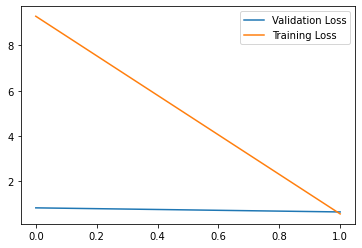

In [29]:
import matplotlib.pyplot as plt
plt.plot(history1.history['val_loss'],label='Validation Loss');
plt.plot(history1.history['loss'],label='Training Loss');
plt.legend();

In [30]:
# now lets built the model using data generation and divide data into train test and validation data

In [31]:
#pip install split-folders

In [32]:
import splitfolders

In [33]:
# splitfolders.ratio(r'/content/drive/MyDrive/Abhishek/imageclass/im', output=r'/content/drive/MyDrive/Abhishek/imageclass/im2',
#     seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        vertical_flip=True,
        rotation_range=20,
        horizontal_flip=True)

In [53]:
test_datagen = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Abhishek/imageclass/im2/test',image_size=(64, 64))

Found 83 files belonging to 3 classes.


In [37]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Abhishek/imageclass/im2/train',
        target_size=(64, 64),
        batch_size=32,color_mode="rgb",shuffle=True
        )


Found 638 images belonging to 3 classes.


In [39]:
validation_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/Abhishek/imageclass/im2/val',
        target_size=(64, 64),
        batch_size=32,color_mode="rgb",shuffle=True
        )

Found 79 images belonging to 3 classes.


In [41]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy']) # here optimizer is use as adamax upgraded version of adam 

In [42]:
 cal1 = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [43]:
history = model.fit(train_generator,epochs=50,validation_data= validation_generator , callbacks=cal1, verbose=1)

Epoch 1/50
20/20 [==============================] - 8s 370ms/step - loss: 0.6933 - accuracy: 0.7931 - val_loss: 0.5851 - val_accuracy: 0.8101
Epoch 2/50
20/20 [==============================] - 7s 352ms/step - loss: 0.5863 - accuracy: 0.8088 - val_loss: 0.5503 - val_accuracy: 0.8101


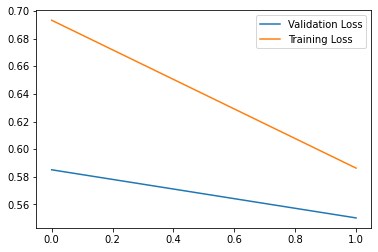

In [44]:
plt.plot(history.history['val_loss'],label='Validation Loss');
plt.plot(history.history['loss'],label='Training Loss');
plt.legend();

In [66]:
train_generator.class_indices

{'FULL_VISIBILITY': 0, 'NO_VISIBILITY': 1, 'PARTIAL_VISIBILITY': 2}

In [73]:
import numpy as np
from keras.preprocessing import image

In [97]:
new_image=image.load_img("/content/drive/MyDrive/Abhishek/imageclass/im2/test/NO_VISIBILITY/GICSD_5_7_213.png",target_size=(64,64))

In [98]:
new_image=image.img_to_array(new_image)

In [99]:
new_image1=np.expand_dims(new_image,axis=0)

In [100]:
result=model.predict(new_image1)

In [101]:
result

array([[1., 0., 0.]], dtype=float32)

In [102]:

if result[0][0]==1:
    predict=print('Full')
elif result[0][1]==1:   
    predict=print('No') 
else:
    predict=print('Partial')

Full


In [103]:
#lets bulit model using transfer learning

In [104]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [106]:
# re-size all the images to this
IMAGE_SIZE = [64, 64]

train_path = '/content/drive/MyDrive/Abhishek/imageclass/im2/train'
valid_path = '/content/drive/MyDrive/Abhishek/imageclass/im2/val'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [107]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [122]:
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Abhishek/imageclass/im2/train/*')

In [124]:
len(folders)

3

In [125]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [126]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [127]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [128]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [130]:

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Abhishek/imageclass/im2/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Abhishek/imageclass/im2/val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 638 images belonging to 3 classes.
Found 79 images belonging to 3 classes.


In [131]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
20/20 [==============================] - 35s 2s/step - loss: 0.6194 - accuracy: 0.8025 - val_loss: 0.5800 - val_accuracy: 0.8354
Epoch 2/5
20/20 [==============================] - 34s 2s/step - loss: 0.5493 - accuracy: 0.8135 - val_loss: 0.5043 - val_accuracy: 0.8354
Epoch 3/5
20/20 [==============================] - 34s 2s/step - loss: 0.5178 - accuracy: 0.8119 - val_loss: 0.4680 - val_accuracy: 0.8354
Epoch 4/5
20/20 [==============================] - 32s 2s/step - loss: 0.4961 - accuracy: 0.8072 - val_loss: 0.4574 - val_accuracy: 0.8608
Epoch 5/5
20/20 [==============================] - 32s 2s/step - loss: 0.4828 - accuracy: 0.8182 - val_loss: 0.4443 - val_accuracy: 0.8481


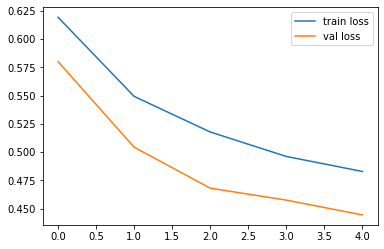

<Figure size 432x288 with 0 Axes>

In [132]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

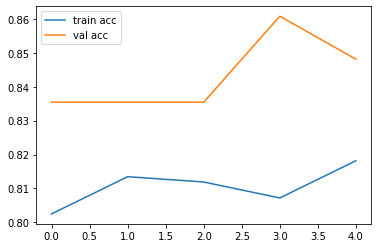

<Figure size 432x288 with 0 Axes>

In [134]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [136]:
result1=model.predict(new_image1)

In [137]:
result1

array([[9.9703860e-01, 2.4429599e-03, 5.1840395e-04]], dtype=float32)